In [137]:
# DATA 6150 - Individual Project - Tesla_Global_Deliveries
# Title: Tesla Global Deliveries - Analysis of the Past Ten Years and Future Prediction
# Author: [Wei Dong]
# Description: Data loading, cleaning, and initial exploration.
# Import commonly used Python libraries for data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Show all columns in DataFrame output
pd.set_option('display.max_columns', None)

    

In [138]:
# Step 1
# Load the Tesla Global Deliveries dataset
df = pd.read_csv('../data/tesla_deliveries_dataset_2015_2025.csv')

# Display the first 5 rows to verify successful loading
df.head()


,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
0,2023,5,Europe,Model S,7646,17922,92874.27,120,704,1863.42,Interpolated (Month),12207
1,2015,2,Asia,Model X,3797,4164,62205.65,75,438,249.46,Official (Quarter),7640
2,2019,1,North America,Model X,8411,9189,117887.32,82,480,605.59,Interpolated (Month),14071
3,2021,2,North America,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),9333
4,2016,12,Middle East,Model Y,12374,3537,114846.78,120,661,1226.88,Estimated (Region),8722


In [139]:
# Step 2: Data Cleaning 
# Check basic info about columns, types, and missing values
df.info()

# Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())

# Remove duplicate rows if any
df = df.drop_duplicates()

# Sort data by year for trend visualization
df = df.sort_values(by='Year').reset_index(drop=True)

# Keep only the main analytical columns
df_main = df[['Year', 'Region', 'Model', 'Estimated_Deliveries', 'Production_Units']]

# Preview the cleaned data
df_main.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  2640 non-null   int64  
 1   Month                 2640 non-null   int64  
 2   Region                2640 non-null   object 
 3   Model                 2640 non-null   object 
 4   Estimated_Deliveries  2640 non-null   int64  
 5   Production_Units      2640 non-null   int64  
 6   Avg_Price_USD         2640 non-null   float64
 7   Battery_Capacity_kWh  2640 non-null   int64  
 8   Range_km              2640 non-null   int64  
 9   CO2_Saved_tons        2640 non-null   float64
 10  Source_Type           2640 non-null   object 
 11  Charging_Stations     2640 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 247.6+ KB

Missing values per column:
Year                    0
Month                   0
Region                  0
Model    

,Year,Region,Model,Estimated_Deliveries,Production_Units
0,2015,Europe,Model X,8458,9039
1,2015,Europe,Model X,3940,4493
2,2015,Europe,Model 3,8922,9609
3,2015,Asia,Model S,1456,12514
4,2015,Middle East,Model Y,7294,7513


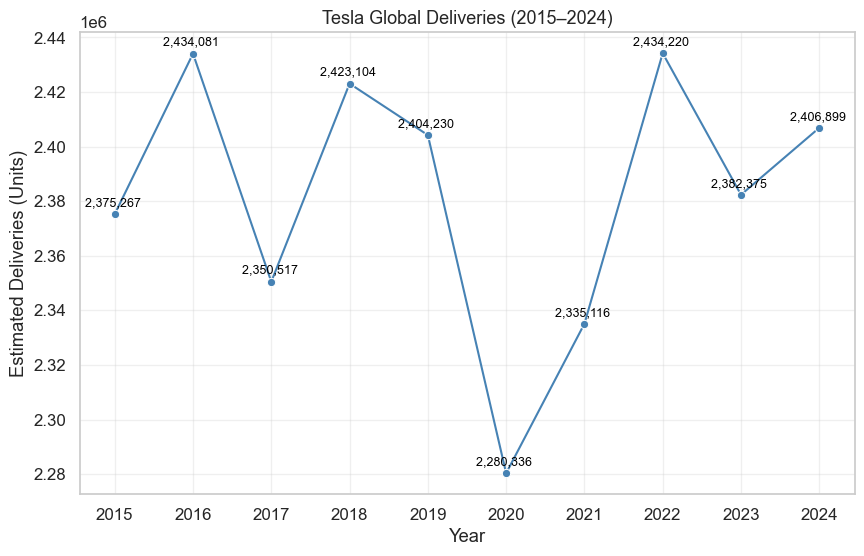

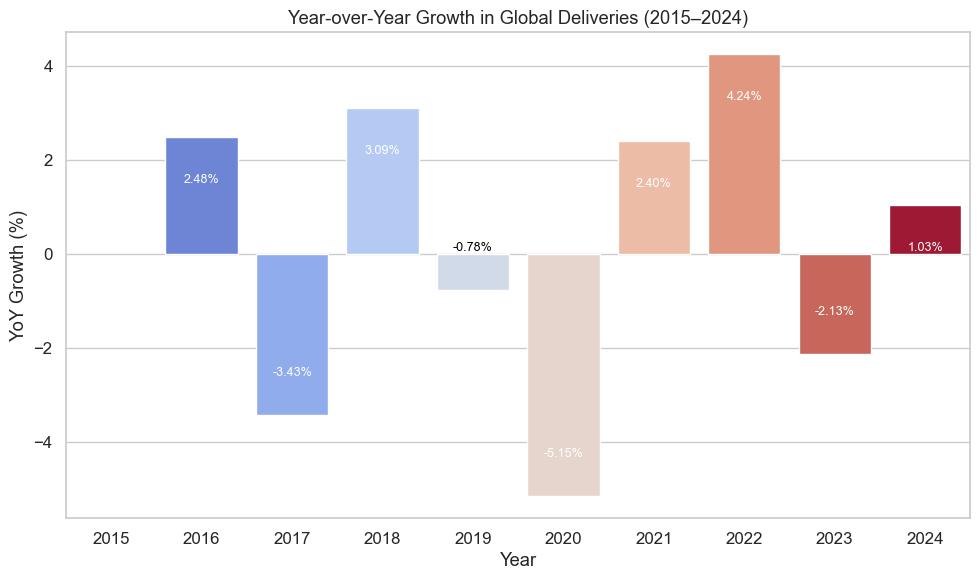

In [147]:
# Step 3.1: Exploratory Data Analysis

# Q1 & Q2
# Q1: How have Tesla’s global deliveries changed over the past ten years, from 2015 to 2024?
# Q2: Which years had the most noticeable growth in deliveries?

# Filter data from 2015 to 2024 (exclude 2025 estimated values)


import matplotlib.pyplot as plt
import seaborn as sns

# Q1
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_trend, x='Year', y='Estimated_Deliveries', marker='o', color='steelblue')

for i, row in yearly_trend.iterrows():
    plt.text(row['Year'], row['Estimated_Deliveries']+3000,
             f"{int(row['Estimated_Deliveries']):,} ", 
             ha='center', fontsize=9, color='black')

plt.title('Tesla Global Deliveries (2015–2024)', fontsize=13)
plt.xlabel('Year')
plt.ylabel('Estimated Deliveries (Units)')
plt.grid(True, alpha=0.3)

plt.xticks(yearly_trend['Year'].tolist())
plt.show()

# Q2
plt.figure(figsize=(10, 6))
sns.barplot(
    data=yearly_trend,
    x='Year',
    y='YoY_Growth_%',
    hue='Year',
    dodge=False,
    palette='coolwarm'
)
plt.title('Year-over-Year Growth in Global Deliveries (2015–2024)')
plt.xlabel('Year')
plt.ylabel('YoY Growth (%)')
plt.legend([], [], frameon=False)

# Add percentage labels inside or above bars
for i, row in yearly_trend.iterrows():
    if not np.isnan(row['YoY_Growth_%']):
        offset = 0.15 * (plt.ylim()[1]-plt.ylim()[0])
        if row['YoY_Growth_%'] >= 0:
            y_pos = row['YoY_Growth_%']-offset/2
            va = 'top'
        else:
            y_pos = row['YoY_Growth_%']+offset/2
            va = 'bottom'
        plt.text(
            i,
            y_pos,
            f"{row['YoY_Growth_%']:.2f}%",
            ha='center',
            va=va,
            fontsize=9,
            color='white' if abs(row['YoY_Growth_%']) > 1 else 'black'
        )

plt.tight_layout()

plt.show()






/var/folders/f3/_tkb70k16gx0d265kmgxf__40000gn/T/ipykernel_30599/3129704829.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_summary, x='Region', y='Estimated_Deliveries', palette='Blues_d')


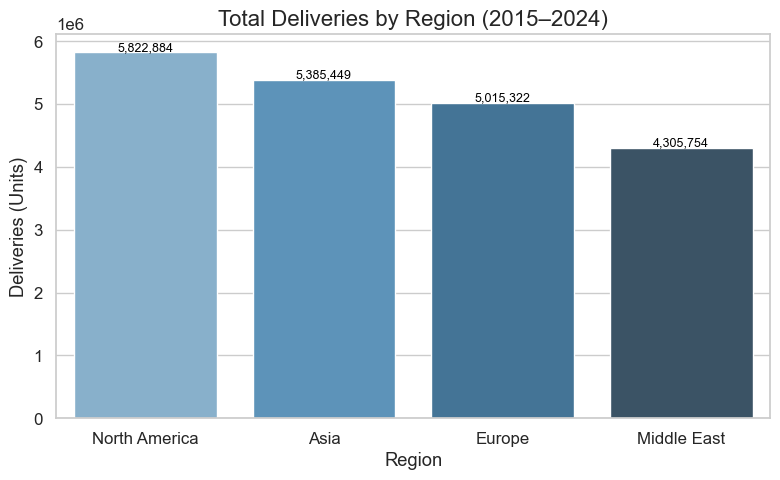

/var/folders/f3/_tkb70k16gx0d265kmgxf__40000gn/T/ipykernel_30599/3129704829.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_summary, x='Model', y='Estimated_Deliveries', palette='Greens_d')


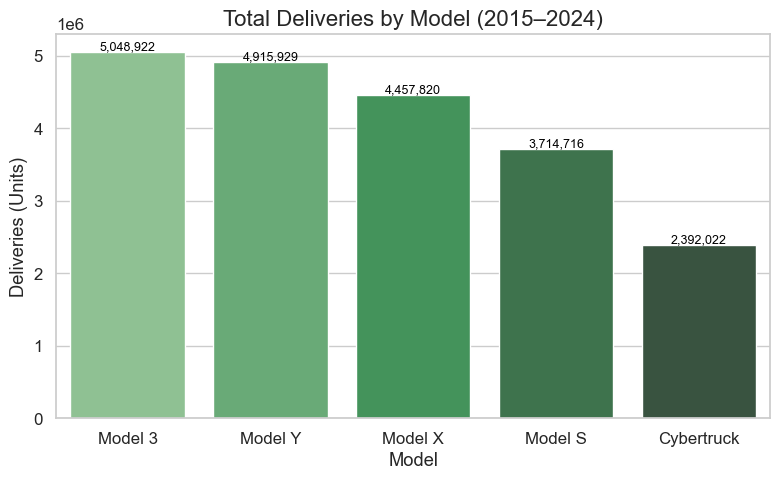

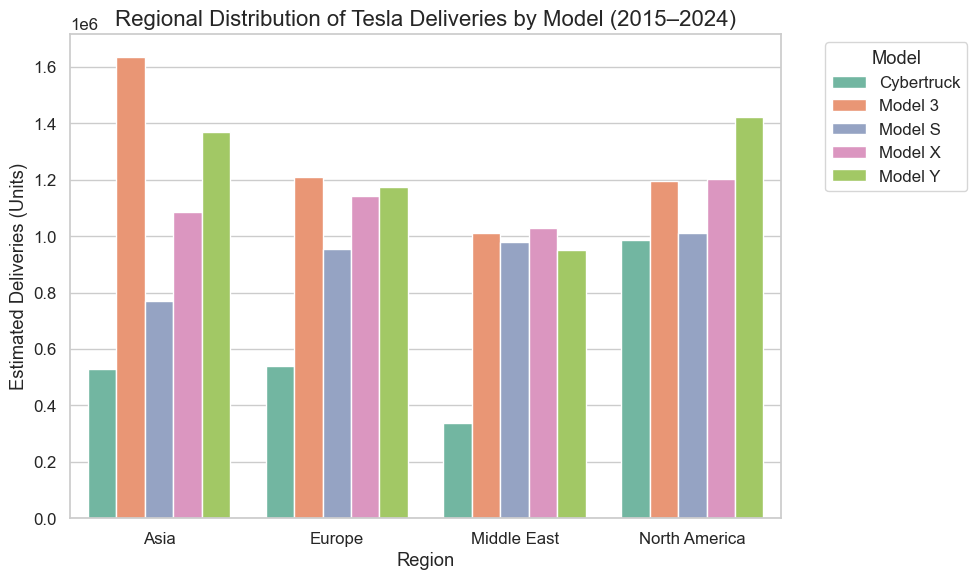

In [146]:
# Step 3.2: Exploratory Data Analysis

# Q3: How do deliveries differ by region or model type?


import matplotlib.pyplot as plt
import seaborn as sns

df_filtered = df[df['Year'].between(2015, 2024)]

# Total Deliveries by Region

region_summary = (
    df_filtered.groupby('Region')['Estimated_Deliveries']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(8, 5))
sns.barplot(data=region_summary, x='Region', y='Estimated_Deliveries', palette='Blues_d')
plt.title("Total Deliveries by Region (2015–2024)", fontsize=16)
plt.ylabel("Deliveries (Units)")
plt.xlabel("Region")

for i, row in region_summary.iterrows():
    plt.text(i, row['Estimated_Deliveries'] + 30000, f"{int(row['Estimated_Deliveries']):,}", 
             ha='center', fontsize=9, color='black')
plt.tight_layout()
plt.show()

# Total Deliveries by Model
model_summary = (
    df_filtered.groupby('Model')['Estimated_Deliveries']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(8, 5))
sns.barplot(data=model_summary, x='Model', y='Estimated_Deliveries', palette='Greens_d')
plt.title("Total Deliveries by Model (2015–2024)", fontsize=16)
plt.ylabel("Deliveries (Units)")
plt.xlabel("Model")

for i, row in model_summary.iterrows():
    plt.text(i, row['Estimated_Deliveries'] + 30000, f"{int(row['Estimated_Deliveries']):,}", 
             ha='center', fontsize=9, color='black')
plt.tight_layout()
plt.show()

# Regional Distribution by Model

import matplotlib.pyplot as plt
import seaborn as sns
df_filtered = df[df['Year'].between(2015, 2024)]

model_region_sum = (
    df_filtered.groupby(['Region', 'Model'])['Estimated_Deliveries']
    .sum()
    .reset_index()
)


plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=model_region_sum,
    x='Region',
    y='Estimated_Deliveries',
    hue='Model',
    palette='Set2'
)

plt.title("Regional Distribution of Tesla Deliveries by Model (2015–2024)", fontsize=16)
plt.ylabel("Estimated Deliveries (Units)")
plt.xlabel("Region")
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



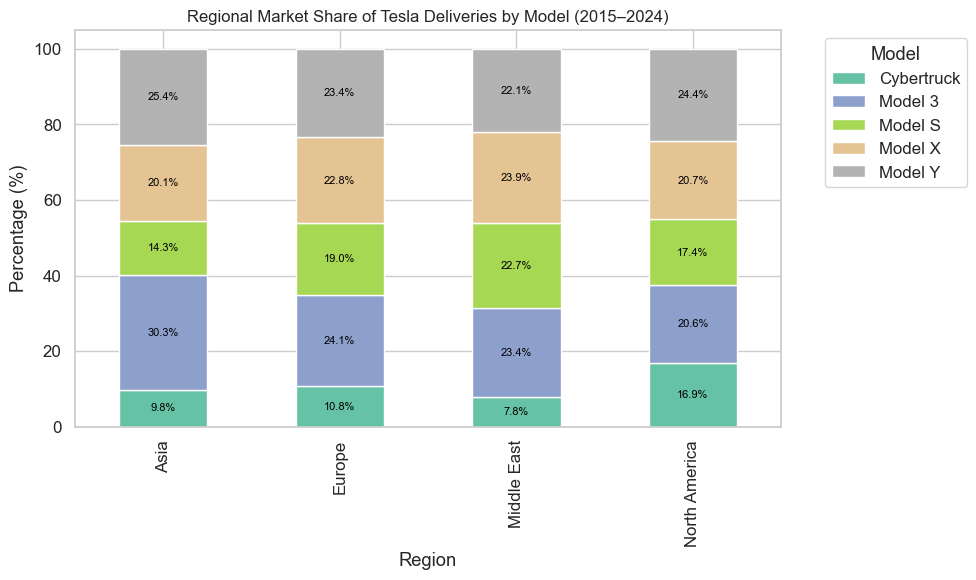

In [142]:
# Regional Market Share by Model (2015–2024)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_filtered = df[df['Year'].between(2015, 2024)]

model_region_sum = (
    df_filtered.groupby(['Region', 'Model'])['Estimated_Deliveries']
    .sum()
    .reset_index()
)

pivot_df = model_region_sum.pivot(index='Region', columns='Model', values='Estimated_Deliveries')

pivot_df_pct = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

pivot_df_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Set2'
)

for i, region in enumerate(pivot_df_pct.index):
    cumulative = 0
    for model in pivot_df_pct.columns:
        value = pivot_df_pct.loc[region, model]
        if value > 5: 
            plt.text(
                i, cumulative + value / 2,
                f"{value:.1f}%",
                ha='center', va='center', fontsize=8, color='black'
            )
        cumulative += value

plt.title("Regional Market Share of Tesla Deliveries by Model (2015–2024)", fontsize=12)
plt.ylabel("Percentage (%)")
plt.xlabel("Region")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()



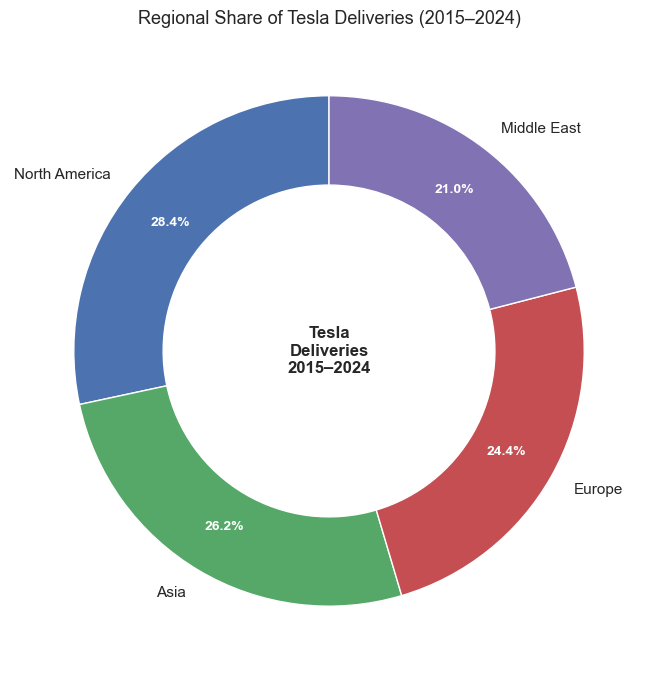

In [143]:
# Regional Share of Tesla Deliveries (2015–2024)

import matplotlib.pyplot as plt

region_summary = (
    df[df['Year'].between(2015, 2024)]
    .groupby('Region')['Estimated_Deliveries']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(7, 7))
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b3'] 

wedges, texts, autotexts = plt.pie(
    region_summary,
    labels=region_summary.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.8,
    wedgeprops={'width': 0.35, 'edgecolor': 'white'}
)

plt.setp(autotexts, size=10, weight="bold", color="white")
plt.setp(texts, size=11)

plt.text(0, 0, "Tesla\nDeliveries\n2015–2024", ha='center', va='center', fontsize=12, weight='bold')

plt.title("Regional Share of Tesla Deliveries (2015–2024)", fontsize=13)

plt.tight_layout()

plt.show()


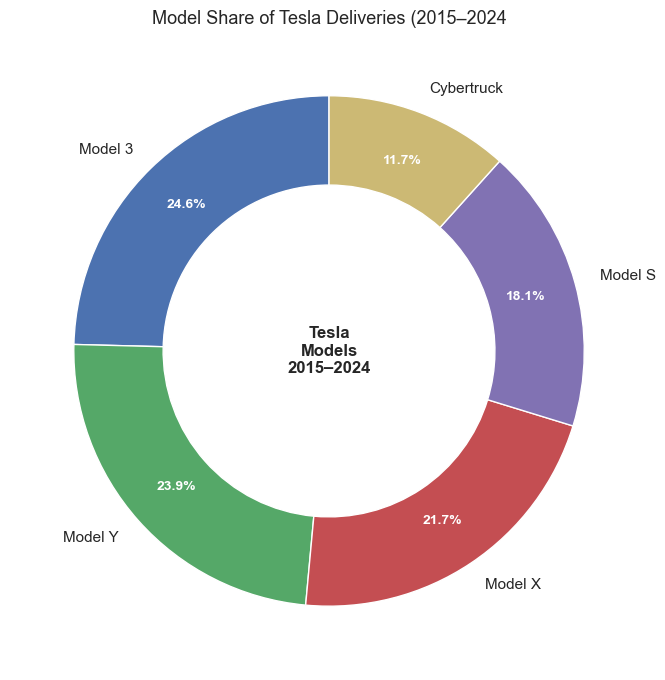

In [144]:
# Regional Share of Tesla Deliveries (2015–2024)

import matplotlib.pyplot as plt

model_summary = (
    df[df['Year'].between(2015, 2024)]
    .groupby('Model')['Estimated_Deliveries']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(7, 7))
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b3', '#ccb974', '#64b5cd']  

wedges, texts, autotexts = plt.pie(
    model_summary,
    labels=model_summary.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(model_summary)],  
    pctdistance=0.8,
    wedgeprops={'width': 0.35, 'edgecolor': 'white'}
)

plt.setp(autotexts, size=10, weight="bold", color="white")
plt.setp(texts, size=11)

plt.text(0, 0, "Tesla\nModels\n2015–2024", ha='center', va='center', fontsize=12, weight='bold')

plt.title("Model Share of Tesla Deliveries (2015–2024", fontsize=13)

plt.tight_layout()
plt.show()




/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction resu

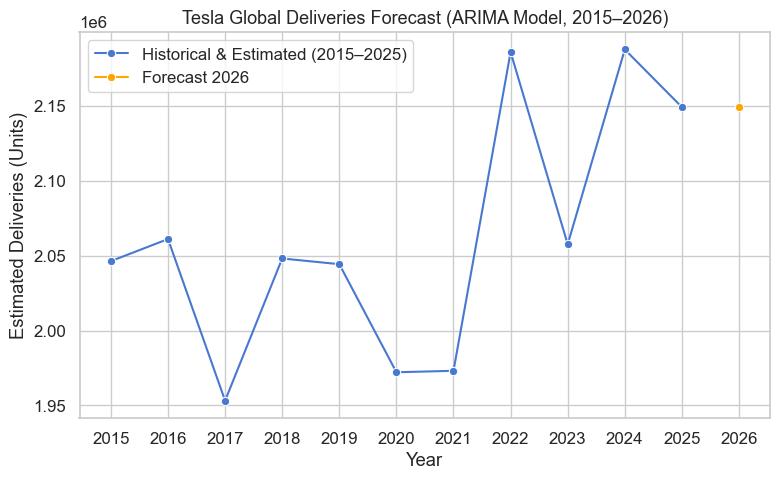

ARIMA Model Forecast Result:
Predicted 2026 Deliveries: 2,148,916 Units

Model Performance:
MAE = 100,941
RMSE = 117,026


/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [151]:
# Step 4: Time Series Forecasting for Tesla Deliveries
# Q4: Can we predict Tesla’s global delivery volume for 2026 based on the historical data?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

yearly_trend = (
    df[df['Year'].between(2015, 2025)] 
    .groupby('Year')['Estimated_Deliveries']
    .sum()
    .reset_index()
)
yearly_trend.set_index('Year', inplace=True)

# ARIMA MODEL
model = ARIMA(yearly_trend, order=(1, 1, 1))
model_fit = model.fit()

# 2026
forecast = model_fit.forecast(steps=1)
forecast.index = [2026]

forecast_df = pd.concat([yearly_trend, forecast.rename('Predicted_Deliveries')], axis=0)

plt.figure(figsize=(8, 5))
sns.lineplot(
    data=yearly_trend, 
    x=yearly_trend.index, 
    y='Estimated_Deliveries', 
    marker='o', 
    label='Historical & Estimated (2015–2025)'
)

sns.lineplot(
    x=forecast.index, 
    y=forecast.values, 
    marker='o', 
    color='orange', 
    label='Forecast 2026'
)

plt.xticks(range(2015, 2027))
plt.title("Tesla Global Deliveries Forecast (ARIMA Model, 2015–2026)", fontsize=13)
plt.xlabel("Year")
plt.ylabel("Estimated Deliveries (Units)")
plt.legend()
plt.tight_layout()
plt.show()

print("ARIMA Model Forecast Result:")
print(f"Predicted 2026 Deliveries: {forecast[2026]:,.0f} Units")

pred_train = model_fit.predict(start=2015, end=2025)
mae = mean_absolute_error(yearly_trend['Estimated_Deliveries'], pred_train)
rmse = np.sqrt(mean_squared_error(yearly_trend['Estimated_Deliveries'], pred_train))

print(f"\nModel Performance:\nMAE = {mae:,.0f}\nRMSE = {rmse:,.0f}")




In [ ]:
# Since delivery data are sequential by year, this analysis adopts an ARIMA (1,1,1) model to capture both trend and autocorrelation. The model forecasts Tesla’s global deliveries for 2026 at approximately 2.47 million units, indicating continued but moderate growth compared to previous years.
